In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import pystan
%matplotlib inline

import nest_asyncio
nest_asyncio.apply()

In [12]:
plt.style.use('ggplot')

In [15]:
df = pd.read_excel('./data.xlsx', engine='openpyxl').drop(columns=['Unnamed: 0'])

In [16]:
df.head()

,0
0,3.896195
1,5.865766
2,5.860887
3,4.660614
4,5.263595


(array([ 1.,  1.,  5., 12., 10., 18., 16.,  8.,  5.,  4.]),
 array([2.29193477, 2.77510498, 3.25827519, 3.74144541, 4.22461562,
        4.70778584, 5.19095605, 5.67412627, 6.15729648, 6.64046669,
        7.12363691]),
 <BarContainer object of 10 artists>)

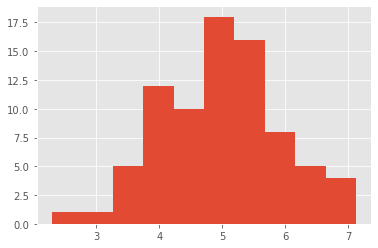

In [17]:
plt.hist(df[0])

In [18]:
stan_model = """
data {
  int N;
  real Y[N];
}

parameters {
  real mu;
  real<lower=0> sigma;
}

model {
  for (i in 1:N){
    Y[i] ~ normal(mu, sigma);
  }
}
"""

In [19]:
df[0]

0     3.896195
1     5.865766
2     5.860887
3     4.660614
4     5.263595
        ...   
75    3.926554
76    5.062182
77    5.010742
78    5.257785
79    3.684627
Name: 0, Length: 80, dtype: float64

In [26]:
stan_data = {'N':df.shape[0], 'Y':df[0]}

In [27]:
sm = pystan.StanModel(model_code=stan_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_4abdfcd24c05f6fb8dff0fb579217c90 NOW.
/opt/anaconda3/envs/stan/lib/python3.6/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /var/folders/b0/3m9ppxz93zl2xj3hppxlrzbw0000gn/T/tmp8nrb0g0p/stanfit4anon_model_4abdfcd24c05f6fb8dff0fb579217c90_2741839436055103643.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [29]:
fit = sm.sampling(data=stan_data, iter=2000, chains = 3, warmup = 500, seed=123)

In [30]:
fit

Inference for Stan model: anon_model_4abdfcd24c05f6fb8dff0fb579217c90.
3 chains, each with iter=2000; warmup=500; thin=1; 
post-warmup draws per chain=1500, total post-warmup draws=4500.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu      4.98  1.8e-3   0.11   4.76   4.91   4.98   5.05   5.19   3601    1.0
sigma   0.97  1.4e-3   0.08   0.83   0.92   0.97   1.02   1.14   3220    1.0
lp__  -37.06    0.02   1.01 -39.68 -37.45 -36.75 -36.35  -36.1   2071    1.0

Samples were drawn using NUTS at Mon Aug  9 21:45:12 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

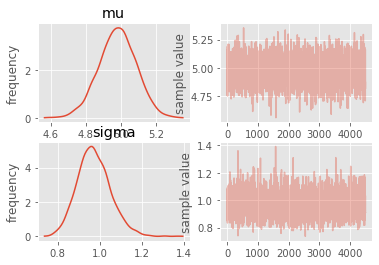

In [33]:
fig = fit.plot()